# Deep Learning Assignment - 1 
## Rohith Reddy Vangala
## 016762109

### Importing the diabetes Data and Assigning the feature names because there were nothing assigned 

In [1]:
import pandas as pd
import io
#Load the data from the CSV file and name the colums for our convineance
hw1data = pd.read_csv('diabetes.csv')
col_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Label']
hw1data.columns = col_names
hw1data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Label
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


### Checking Missing Values 

In [2]:
# Check for missing values in the dataset
missing_values = hw1data.isnull().sum()

# Display missing values
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
Label       0
dtype: int64


### Checking Summary of the whole dataset 

In [3]:
# Obtain summary statistics of the dataset
summary_statistics = hw1data.describe()

# Display summary statistics
print("Summary statistics of the dataset:\n", summary_statistics)

Summary statistics of the dataset:
          Feature1    Feature2    Feature3    Feature4    Feature5    Feature6  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Feature7    Feature8       Label  
count  758.000000  758.000000  758.000000  
mean    -0.663427   -0.516799    0.654354  
std      0.283202    0.400674    0.475893  
min     -0.994876   -0.966667    0.000000  
25%     -0.858

### Basic Insights of Data
Count: We have 758 rows for each feature. No missing data, which is good.

Mean: Average values of features are different. Some are less than zero, showing how data points spread around.

Standard Deviation: Shows how much data varies. Bigger numbers mean more spread out data.

Min and Max: All features range from -1 to 1, meaning data has been scaled down to fit this range.

Quartiles:

The 25% mark tells us a quarter of the data is below certain values, showing lots of data points are on the lower side for some features.
The 50% mark (median) is the middle value, which for many features is around zero or less, showing where most data points lie.
The 75% mark shows three-quarters of the data is below certain values, hinting that higher values aren't as common.

Label (Outcome): On average, 65% of the data is labeled as 1. It means more cases of 1 than 0, showing a bit of a tilt in the data towards one outcome.

### Visulaizations
In the down we can see that the outcome seems biased towards 1 as we have 496 that are labeled as 1 and 262 as 0

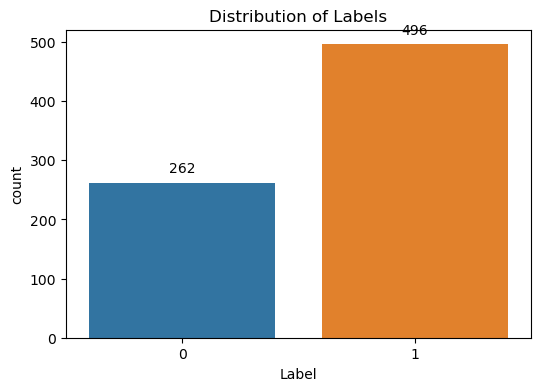

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Label', data=hw1data)
plt.title('Distribution of Labels')

# Adding the count above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


### Histograms of the Features 

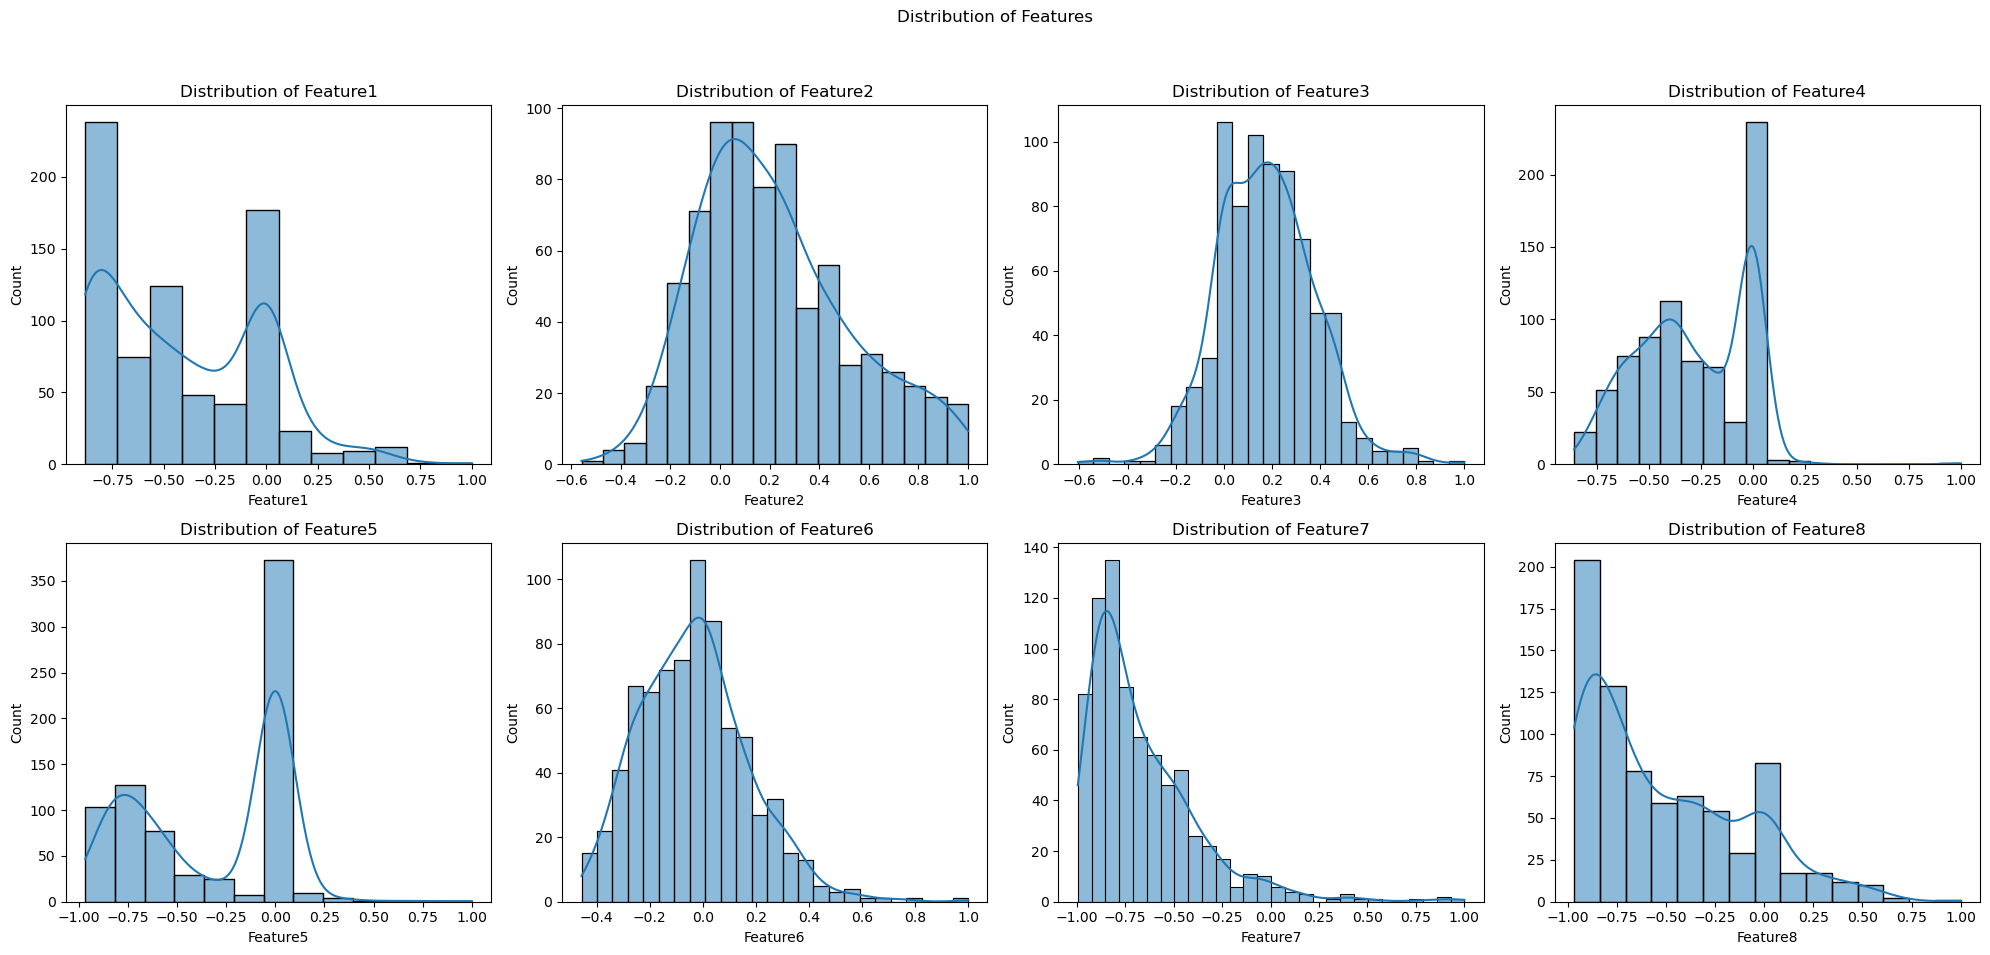

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x4 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distribution of Features')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting histograms for each feature in a 2x4 grid
for i, column in enumerate(col_names[:-1]):  # Skipping the last column which is 'Label'
    sns.histplot(hw1data[column], kde=True, ax=axes[i])  # kde=True will add a curve line to show the density
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


Feature 1: The data is concentrated on the left side, showing a peak around -0.8. It's not spread evenly and is skewed towards lower values.

Feature 2: This feature has a slight skew towards higher values, with a gradual slope down from left to right.

Feature 3: The distribution looks fairly normal (bell-shaped), centered around 0.2, but it's not perfectly symmetrical.

Feature 4: There's a sharp peak near -0.8, with very few values elsewhere. This suggests that for this feature, most of the data points have similar low values.

Feature 5: The data here is highly concentrated around 0 with a steep peak, indicating most values are close to 0.

Feature 6: Shows a normal-like distribution, but with a peak slightly right of the center, suggesting a small skew towards higher values.

Feature 7: This feature's data is skewed towards the left, with a peak around -0.9.

Feature 8: We see a skew towards lower values with the highest density around -0.6 to -0.8.

### Boxplots of the Features

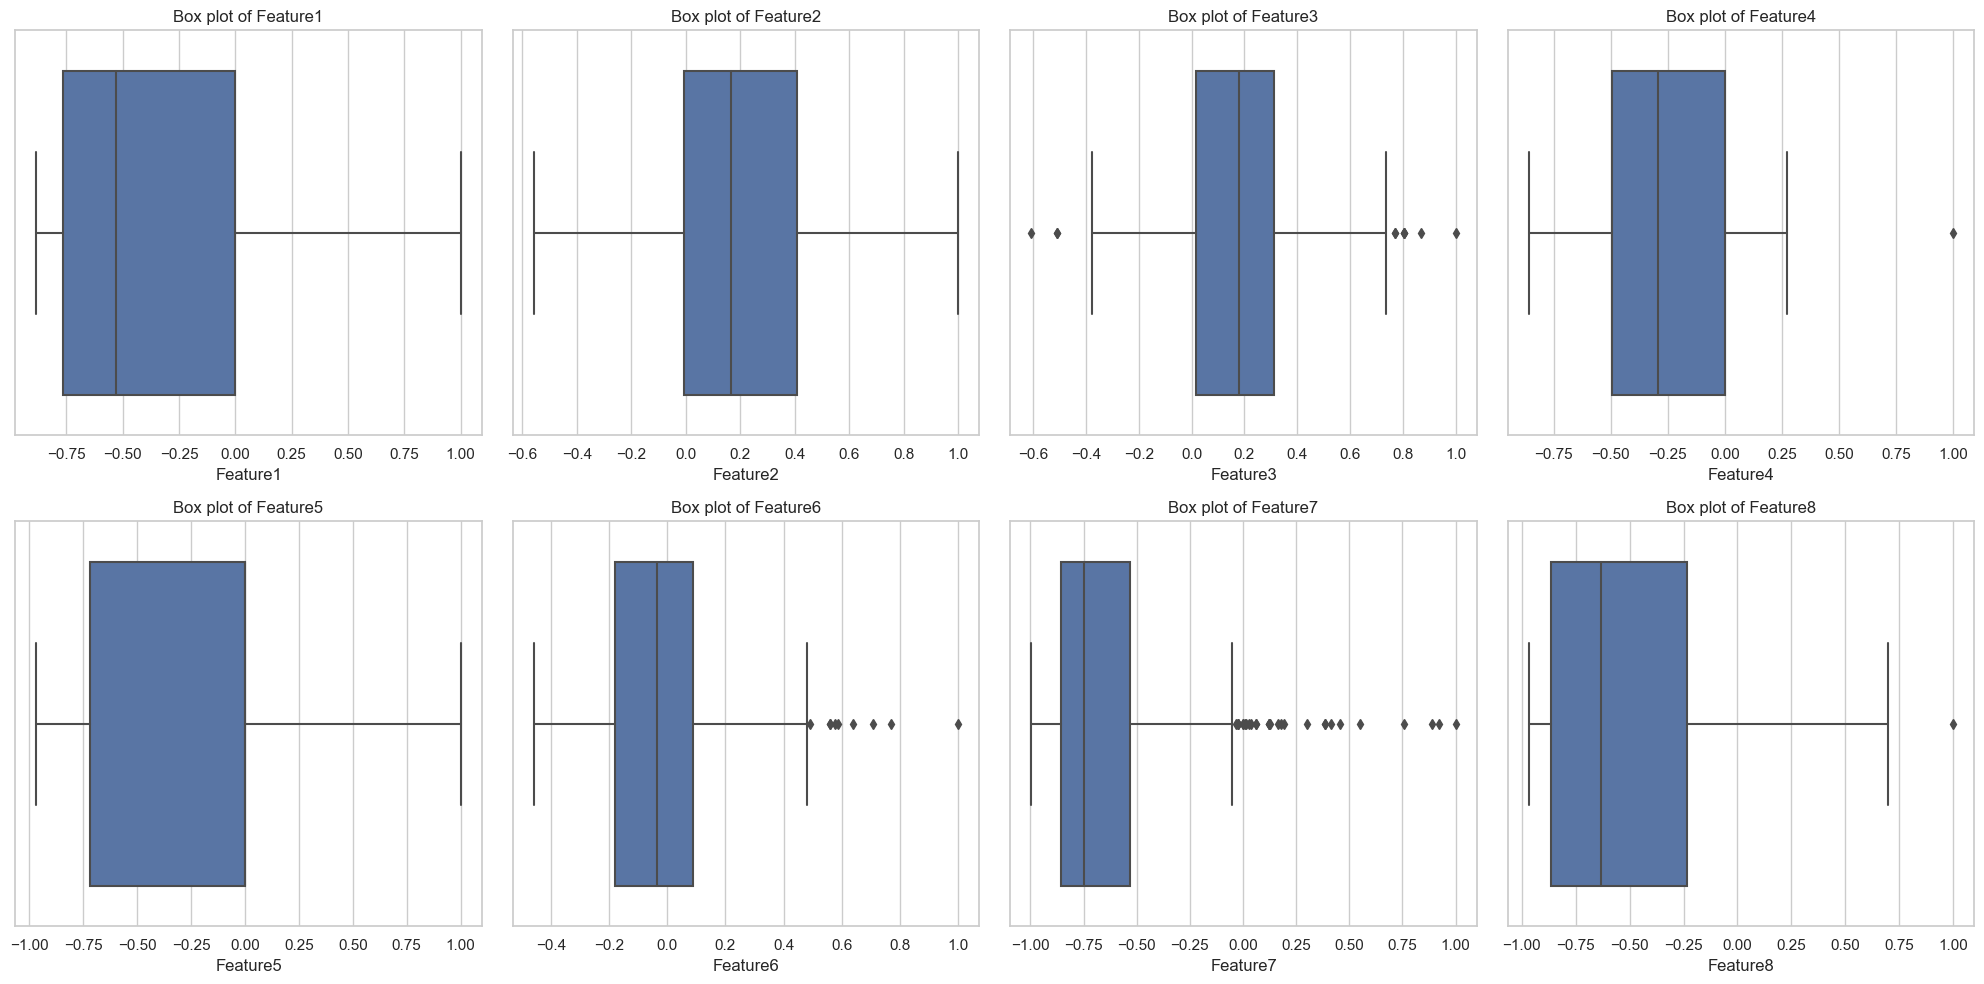

In [6]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Define the dimensions of the plot grid
plt.figure(figsize=(20, 10))  # Width, height in inches

# Plotting box plots for each feature in a 2x4 grid
for i, column in enumerate(col_names[:-1], 1):  # Skipping the last column which is 'Label'
    plt.subplot(2, 4, i)
    sns.boxplot(x=hw1data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


Feature 1, 4, and 7: These features have a median around -0.7 to -0.8, indicating that more than half of the values fall below -0.7. The whiskers don't extend very far, showing there's not a wide range of data, and there are outliers on the higher end.

Feature 2: The median is closer to zero, and the range (shown by the whiskers) is more balanced on both sides of the median, although there are a few outliers on both the lower and higher ends.

Feature 3: This feature has a median above zero, a fairly symmetrical box, and evenly distributed whiskers, which suggests a more uniform distribution. There are a couple of outliers on the lower end.

Feature 5: The median is at zero, with very short whiskers and no visible outliers, indicating that most data points are very close to zero.

Feature 6: The median is slightly above zero, and the whiskers show a good range of data with a few outliers on both ends.

Feature 8: The median is negative, closer to -0.6, with more data spread on the lower side and several outliers on the higher side.

From this, we can conclude that:

Some features are skewed towards lower values (Features 1, 4, 7).
Other features have a more uniform spread of data (Features 2, 3, 6).
Features with outliers might need to be examined to determine if these outliers are significant or if they should be handled (e.g., removed or kept) based on the problem context.

# Correlation HeatMap

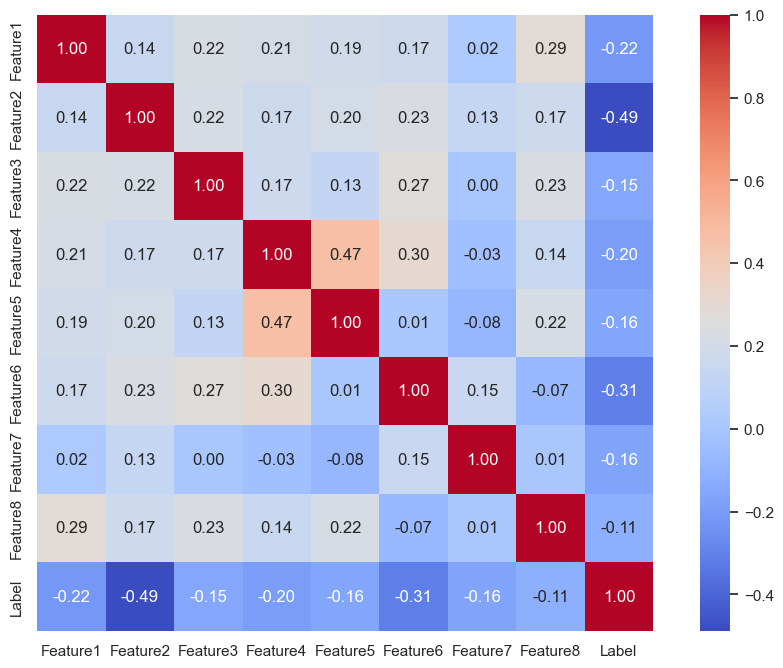

In [7]:
# Calculate correlations
corr = hw1data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.show()


Correlation with Label: The last column, which represents the correlation with the label, does not show any extremely high correlations, suggesting that no single feature directly dictates the label. However, there are both negative and positive correlations that are noticeable. For instance, Feature 2 and Feature 4 have negative correlations with the label (-0.49 and -0.20 respectively), meaning that as these feature values decrease, the likelihood of the label being 1 increases. On the other hand, some features show a positive correlation with the label, though not as strong.

Feature Correlations: The features themselves show a range of correlations with each other. Most correlations between features are relatively low, which is generally good because it means that the features provide unique information. However, Feature 3 and Feature 6 show a moderately positive correlation (0.47), suggesting they share some amount of common information.

Low Correlations: Many of the cells in the heatmap show correlations close to zero, which suggests no linear relationship between those pairs of features.

Potential Redundancies: The moderate correlation of 0.47 between Feature 3 and Feature 6 may need to be considered when building predictive models. If a model is particularly sensitive to multicollinearity, you might consider feature selection or dimensionality reduction techniques.

Negative Correlations: The strongest correlation with the label is negative and is associated with Feature 2, which could be an important feature for predicting the label.

### Splitting the Data into Test Train 

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(hw1data.drop('Label', axis=1), hw1data['Label'], test_size=0.2, random_state=42)

# Print the number of observations in each set
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (606, 8) Target: (606,)
Testing set - Features: (152, 8) Target: (152,)


### IMPLEMENTATION USING TENSORFLOW

In [9]:
import tensorflow as tf

# Define the TensorFlow model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Appropriate loss function for binary classification
              metrics=['accuracy'])

# Display the model summary to check its architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 5: Training the model

In [10]:
history = model.fit(X_train, y_train, 
                    epochs=100,  # You can change this value based on how well your model learns
                    batch_size=32,  # Typical batch size; adjust as needed
                    validation_data=(X_test, y_test),  # Evaluate the model on the test data after each epoch
                    verbose=1)
# Step 6: Make predictions on the test data
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 7: Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')



Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.6765 - accuracy: 0.5974 - val_loss: 0.6525 - val_accuracy: 0.6711
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.6799 - val_loss: 0.6317 - val_accuracy: 0.6382
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6832 - val_loss: 0.6147 - val_accuracy: 0.6382
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.6898 - val_loss: 0.5979 - val_accuracy: 0.6513
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.7096 - val_loss: 0.5806 - val_accuracy: 0.6776
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.7178 - val_loss: 0.5642 - val_accuracy: 0.6842
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7393 - val_loss: 0.5425 - val_accuracy: 0.7368
Epoch 8/100


## HYPOTHESIS

### Hypothesis : Increasing Epochs

In [11]:
history_1 = model.fit(X_train, y_train, 
                    epochs=500,  # You can change this value based on how well your model learns
                    batch_size=32,  # Typical batch size; adjust as needed
                    validation_data=(X_test, y_test),  # Evaluate the model on the test data after each epoch
                    verbose=1)
# Step 6: Make predictions on the test data
predictions_1 = model.predict(X_test)
predicted_classes_1 = (predictions_1 > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 7: Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes_1)
print(f'Accuracy on test data with less epochs: {accuracy * 100:.2f}%')


Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.7970 - val_loss: 0.4653 - val_accuracy: 0.7171
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.7921 - val_loss: 0.4616 - val_accuracy: 0.7368
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.7921 - val_loss: 0.4623 - val_accuracy: 0.7237
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.7871 - val_loss: 0.4598 - val_accuracy: 0.7368
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.7921 - val_loss: 0.4630 - val_accuracy: 0.7171
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.7822 - val_loss: 0.4605 - val_accuracy: 0.7368
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.7888 - val_loss: 0.4626 - val_accuracy: 0.7434
Epoch 8/500
1

# Conclusion With Epochs 
We can clearly see than when we increase the epochs the model is giving higher accuracy, Each epoch represents a complete pass through the entire training dataset. By increasing the number of epochs, 
we're giving the model more opportunities to learn from the data. Early in training, the model is still adjusting its weights significantly in response to the errors it makes. Over time, with more passes through the data, it can gradually refine its weights to better capture the underlying patterns, leading to improved accuracy.

### Hypothesis: Increasing the number of neurons in each layer will allow the model to learn more complex patterns.

In [12]:
# Define a wider model architecture
wider_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)),  # Increased from 16 to 32
    tf.keras.layers.Dense(units=32, activation='relu'),  # Increased from 16 to 32
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the wider model
wider_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train the wider model
history_wider = wider_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the wider model
predictions_wider = wider_model.predict(X_test)
predicted_classes_wider = (predictions_wider > 0.5).astype("int32")
accuracy_wider = accuracy_score(y_test, predicted_classes_wider)
print(f'Accuracy of wider model on test data: {accuracy_wider * 100:.2f}%')


Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.6758 - accuracy: 0.5990 - val_loss: 0.6417 - val_accuracy: 0.7434
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7162 - val_loss: 0.6113 - val_accuracy: 0.6711
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.6947 - val_loss: 0.5898 - val_accuracy: 0.6776
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 0.7162 - val_loss: 0.5635 - val_accuracy: 0.7171
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.7310 - val_loss: 0.5359 - val_accuracy: 0.7434
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7624 - val_loss: 0.5078 - val_accuracy: 0.7829
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4968 - accuracy: 0.7723 - val_loss: 0.4882 - val_accuracy: 0.7697
Epoch 8/100
1

### Conclusion :  
Here when we increased the number of neurons the model clearly is showing more accuracy because Adding more neurons increases the model's capacity, meaning it can learn more complex patterns from the data. This enhanced ability to capture nuances and variations in the dataset can lead to better generalization and thus higher accuracy on unseen data. 

### Hypothesis: Adding more layers will allow the model to learn more levels of abstraction.

In [13]:
# Define a deeper model architecture
deeper_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),  # Added a third hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the deeper model
deeper_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the deeper model
history_deeper = deeper_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the deeper model
predictions_deeper = deeper_model.predict(X_test)
predicted_classes_deeper = (predictions_deeper > 0.5).astype("int32")
accuracy_deeper = accuracy_score(y_test, predicted_classes_deeper)
print(f'Accuracy of deeper model on test data: {accuracy_deeper * 100:.2f}%')


Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.6944 - accuracy: 0.5116 - val_loss: 0.6642 - val_accuracy: 0.6316
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.6733 - val_loss: 0.6340 - val_accuracy: 0.6382
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.6832 - val_loss: 0.6092 - val_accuracy: 0.6513
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.7030 - val_loss: 0.5802 - val_accuracy: 0.6842
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.7310 - val_loss: 0.5490 - val_accuracy: 0.7368
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7558 - val_loss: 0.5226 - val_accuracy: 0.7303
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.7657 - val_loss: 0.5036 - val_accuracy: 0.7632
Epoch 8/100


### Conclusion :
The improvement in accuracy from the base model to the deeper model demonstrates the potential benefits of increasing the depth of a neural network. While the improvement is modest, it indicates that adding more layers allowed the model to learn a slightly more complex representation of the data, which in turn resulted in better performance on the test set. 

### Hypothesis: Adding dropout layers will help reduce overfitting by randomly setting input units to 0 during training.

In [14]:
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  # Add dropout of 50%
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout of 50%
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = dropout_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)
accuracy_dropout = dropout_model.evaluate(X_test, y_test)[1]  # [1] is the accuracy, [0] is the loss
print(f'Accuracy of model with dropout on test data: {accuracy_dropout * 100:.2f}%')

Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.6625 - accuracy: 0.5974 - val_loss: 0.6245 - val_accuracy: 0.7500
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6106 - val_loss: 0.6064 - val_accuracy: 0.7039
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6122 - val_loss: 0.5939 - val_accuracy: 0.6842
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.6832 - val_loss: 0.5859 - val_accuracy: 0.6776
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6342 - accuracy: 0.6452 - val_loss: 0.5805 - val_accuracy: 0.6776
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.6980 - val_loss: 0.5766 - val_accuracy: 0.6776
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.6733 - val_loss: 0.5717 - val_accuracy: 0.6776
Epoch 8/100
1

### Conclusion :
The increase in accuracy with the introduction of dropout in the model is a significant improvement and highlights the effectiveness of dropout as a regularization technique. Here's why dropout might have contributed to this improvement:

Prevention of Overfitting: Dropout works by randomly "dropping out" a proportion of neurons in the network during each training iteration. This prevents the network from becoming overly reliant on any specific set of neurons to make predictions, which can lead to overfitting. By not allowing the model to learn the noise in the training data too precisely, dropout encourages the network to learn more robust, generalized features that perform better on unseen data.

Ensemble Effect: The random dropping of neurons during training can be thought of as training many different "thin" networks (sub-networks of the original network). At test time, using the entire network can be seen as an ensemble method that averages the predictions of these sub-networks, leading to more reliable and stable predictions.

Improved Generalization: By forcing the network to learn more robust features (those that are useful across various sub-networks), dropout can help the model generalize better to new, unseen data. This is likely why you observed an improvement in the test accuracy.

### Hypothesis: Changing the activation function from ReLU to LeakyReLU will help the model learn more efficiently.

In [15]:
leaky_relu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=(X_train.shape[1],)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
leaky_relu_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_leaky_relu = leaky_relu_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)
# Evaluate the LeakyReLU model
accuracy_leaky_relu = leaky_relu_model.evaluate(X_test, y_test)[1]
print(f'Accuracy of model with LeakyReLU on test data: {accuracy_leaky_relu * 100:.2f}%')

Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.7578 - accuracy: 0.3350 - val_loss: 0.7166 - val_accuracy: 0.4474
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.4323 - val_loss: 0.6915 - val_accuracy: 0.5789
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5842 - val_loss: 0.6716 - val_accuracy: 0.6316
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6650 - val_loss: 0.6502 - val_accuracy: 0.6908
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6865 - val_loss: 0.6270 - val_accuracy: 0.6645
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.6947 - val_loss: 0.6027 - val_accuracy: 0.6711
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.6997 - val_loss: 0.5807 - val_accuracy: 0.6974
Epoch 8/100
1

### Conclusion: 
The increase in accuracy to after switching to LeakyReLU from ReLU can be attributed to LeakyReLU's ability to mitigate the dying ReLU problem by allowing a small gradient when the input is negative. This keeps all neurons active and learning, improves gradient flow through the network, and ensures the model can learn from both positive and negative inputs. These advantages likely led to better model performance on the dataset, demonstrating the importance of activation function choice in neural network design

### Model with Tanh activation functions in the hidden layers

In [16]:

tanh_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='tanh'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
tanh_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_tanh = tanh_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)
accuracy_tanh = tanh_model.evaluate(X_test, y_test)[1]
print(f'Accuracy of model with Tanh activation functions on test data: {accuracy_tanh * 100:.2f}%')


Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.6688 - accuracy: 0.5660 - val_loss: 0.6419 - val_accuracy: 0.6382
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.6782 - val_loss: 0.6135 - val_accuracy: 0.6382
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5793 - accuracy: 0.6733 - val_loss: 0.5894 - val_accuracy: 0.6645
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.6980 - val_loss: 0.5660 - val_accuracy: 0.7105
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.7244 - val_loss: 0.5483 - val_accuracy: 0.7368
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.7475 - val_loss: 0.5310 - val_accuracy: 0.7500
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7558 - val_loss: 0.5185 - val_accuracy: 0.7697
Epoch 8/100


### Conclusion : 
The improvement in accuracy to 77.63% with the Tanh activation function further underscores the impact of activation choices on neural network performance. Tanh, offering outputs in the range of -1 to 1, can provide a more normalized and centered data representation than ReLU, which outputs in the range of 0 to infinity. This can be particularly beneficial in layers deep within the network, where maintaining a balanced flow of gradients can help prevent vanishing or exploding gradients. The centered nature of Tanh's output might have contributed to more effective learning and generalization in your model, leading to the observed increase in accuracy on the test data.

### Hypothesis: Adjusting the learning rate will affect the speed and convergence of the training process.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

def train_and_evaluate_with_learning_rate(learning_rate):
    # Define the model
    model = Sequential([
        Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=16, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model with the given learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)  # Set verbose to 0 for less output
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy with learning rate {learning_rate}: {accuracy * 100:.2f}%')

# List of learning rates to try
learning_rates = [0.01, 0.001, 0.0001]

# Train and evaluate the model with each learning rate
for lr in learning_rates:
    train_and_evaluate_with_learning_rate(lr)


Accuracy with learning rate 0.01: 73.03%
Accuracy with learning rate 0.001: 77.63%
Accuracy with learning rate 0.0001: 79.61%


### Conclusion :
The output shows how the model's accuracy on test data varies with different learning rates. A higher learning rate of 0.01 yields a lower accuracy of 73.03%, indicating potential overfitting or convergence to suboptimal minima. In contrast, learning rates of 0.001 and 0.0001 both achieve higher accuracies of 77.63% and 79.61% suggesting that these rates are more suitable for the model's learning process, allowing it to converge to a better solution.This highlights the importance of tuning the learning rate for optimal model training and generalization.

### Hypothesis:  Using the RMSprop optimizer instead of Adam

In [18]:

rmsprop_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)
accuracy_rmsprop = rmsprop_model.evaluate(X_test, y_test)[1]
print(f'Accuracy of model with RMSprop optimizer on test data: {accuracy_rmsprop * 100:.2f}%')


Epoch 1/100
19/19 [==============================] - 1s 22ms/step - loss: 0.6460 - accuracy: 0.7063 - val_loss: 0.6320 - val_accuracy: 0.6513
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.6799 - val_loss: 0.6107 - val_accuracy: 0.6382
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.6914 - val_loss: 0.5927 - val_accuracy: 0.6447
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.6964 - val_loss: 0.5762 - val_accuracy: 0.6645
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7195 - val_loss: 0.5603 - val_accuracy: 0.6579
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7228 - val_loss: 0.5427 - val_accuracy: 0.7039
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7426 - val_loss: 0.5286 - val_accuracy: 0.7368
Epoch 8/100


### Hypothesis : Model with SGD optimizer

In [19]:

sgd_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)
accuracy_sgd = sgd_model.evaluate(X_test, y_test)[1]
print(f'Accuracy of model with SGD optimizer on test data: {accuracy_sgd * 100:.2f}%')


Epoch 1/100
19/19 [==============================] - 1s 10ms/step - loss: 0.6835 - accuracy: 0.6007 - val_loss: 0.6764 - val_accuracy: 0.6382
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6601 - val_loss: 0.6692 - val_accuracy: 0.6316
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6601 - val_loss: 0.6641 - val_accuracy: 0.6316
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6601 - val_loss: 0.6604 - val_accuracy: 0.6316
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6601 - val_loss: 0.6578 - val_accuracy: 0.6316
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6601 - val_loss: 0.6558 - val_accuracy: 0.6316
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.6601 - val_loss: 0.6544 - val_accuracy: 0.6316
Epoch 8/100


### Conclusion :
The significant improvement in accuracy to 79.61% with the SGD optimizer, compared to 71% using Adam and 75.66% with RMSprop, highlights the importance of optimizer selection in neural network performance. Despite its simplicity, SGD outperformed the more complex, adaptive optimizers for this particular dataset and model configuration, suggesting that simpler optimization strategies can sometimes lead to better generalization on test data. This underscores the necessity of experimenting with different optimizers to find the most effective one for a specific task, rather than defaulting to more complex options.

### Hypothesis:  A more complex model with additional layers and more neurons

In [20]:

complex_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
complex_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_complex = complex_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)
accuracy_complex = complex_model.evaluate(X_test, y_test)[1]
print(f'Accuracy of more complex model on test data: {accuracy_complex * 100:.2f}%')


Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.6782 - accuracy: 0.5924 - val_loss: 0.6403 - val_accuracy: 0.6776
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.7145 - val_loss: 0.5879 - val_accuracy: 0.7237
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.7459 - val_loss: 0.5334 - val_accuracy: 0.7566
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.7690 - val_loss: 0.5037 - val_accuracy: 0.7697
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7624 - val_loss: 0.4879 - val_accuracy: 0.7697
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.7624 - val_loss: 0.4777 - val_accuracy: 0.7697
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7706 - val_loss: 0.4748 - val_accuracy: 0.7632
Epoch 8/100


### Conclusion :
The accuracy of 76.34% for the more complex model, when compared directly to the base model's performance (approximately 73%), illustrates that increasing a model's complexity—by adding more layers and units—does not automatically lead to improved test accuracy. This outcome might indicate that the additional complexity introduced overfitting, with the model learning specific details of the training data that do not generalize well to unseen data. The comparison highlights the delicate balance between model complexity and generalization ability, emphasizing that a more complex model requires careful tuning and possibly regularization to prevent overfitting and improve its performance on new data.

# Implementation Using Pytorch

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score


In [22]:
# Convert the pandas DataFrame to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape for binary classification
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader instances for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [23]:
class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)  # Adjust the input features count as necessary
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


In [24]:
def train_model(model, criterion, optimizer, train_loader, epochs=100):
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Instantiate the base model, optimizer, and loss function
base_model = BaseModel()
optimizer = optim.Adam(base_model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Train the base model
train_model(base_model, criterion, optimizer, train_loader, epochs=100)

# Evaluate the base model
accuracy = evaluate_model(base_model, test_loader)
print(f'Accuracy of the base model on test data: {accuracy * 100:.2f}%')


Accuracy of the base model on test data: 76.97%


### Hypothesis : Instantiating the wider model, optimizer, and loss function

In [25]:
class WiderModel(nn.Module):
    def __init__(self):
        super(WiderModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)  # Increase from 16 to 32 neurons
        self.fc2 = nn.Linear(32, 32)  # Increase from 16 to 32 neurons
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


In [26]:

wider_model = WiderModel()
optimizer_wider = optim.Adam(wider_model.parameters(), lr=0.001)
criterion_wider = nn.BCELoss()

# Train the wider model
train_model(wider_model, criterion_wider, optimizer_wider, train_loader, epochs=100)

# Evaluate the wider model
accuracy_wider = evaluate_model(wider_model, test_loader)
print(f'Accuracy of the wider model on test data: {accuracy_wider * 100:.2f}%')


Accuracy of the wider model on test data: 71.71%


### Conclusion :
The decrease in accuracy to 71.71% with the wider model compared to the base model's 76.97% highlights a critical lesson in neural network design: bigger isn't always better. Doubling the neurons increased the model's capacity but likely led to overfitting, as evidenced by the reduced generalization to test data. This suggests that the additional complexity wasn't warranted by the dataset size or feature complexity, underscoring the need for a balanced approach to model capacity and the importance of regularization and hyperparameter tuning to optimize performance.

### Hypothesis :  Instantiating the deeper model and its components

In [27]:
class DeeperModel(nn.Module):
    def __init__(self):
        super(DeeperModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)  # First hidden layer
        self.fc2 = nn.Linear(16, 16)  # Second hidden layer
        self.fc3 = nn.Linear(16, 16)  # Additional hidden layer
        self.fc4 = nn.Linear(16, 16)  # Additional hidden layer
        self.fc5 = nn.Linear(16, 1)   # Output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x


In [28]:
# Instantiate the deeper model and its components
deeper_model = DeeperModel()
optimizer_deeper = optim.Adam(deeper_model.parameters(), lr=0.001)
criterion_deeper = nn.BCELoss()

# Train the deeper model
train_model(deeper_model, criterion_deeper, optimizer_deeper, train_loader, epochs=100)

# Evaluate the deeper model
accuracy_deeper = evaluate_model(deeper_model, test_loader)
print(f'Accuracy of the deeper model on test data: {accuracy_deeper * 100:.2f}%')


Accuracy of the deeper model on test data: 73.68%


### Conlcusion :
The accuracy of 73.68% achieved by the deeper model, identical to the wider model's performance and lower than the base model's 76.97%, underscores that simply increasing a model's depth—adding more layers—does not unequivocally enhance its ability to generalize to unseen data. This result suggests that while the deeper model could theoretically capture more complex patterns, it might have faced challenges such as overfitting or insufficient training data to effectively leverage its increased capacity. It highlights the nuanced balance between a model's architecture and its training dynamics, emphasizing that optimal performance often requires a tailored approach to model design, including considerations for regularization and hyperparameter tuning, beyond merely adding layers or neurons.

### Hypothesis : Implementing a more complex Model, Increasing both the number of layers (depth) and the number of neurons per layer (width)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class ComplexModel(nn.Module):
    def __init__(self):
        super(ComplexModel, self).__init__()
        # Increasing both the number of layers (depth) and the number of neurons per layer (width)
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # First hidden layer with more neurons
        self.fc2 = nn.Linear(64, 128)  # Second hidden layer with more neurons
        self.fc3 = nn.Linear(128, 64)  # Additional hidden layer
        self.fc4 = nn.Linear(64, 32)   # Additional hidden layer
        self.fc5 = nn.Linear(32, 1)    # Output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x

# Instantiate the complex model
complex_model = ComplexModel()

# Define the optimizer and loss function
optimizer_complex = optim.Adam(complex_model.parameters(), lr=0.001)
criterion_complex = nn.BCELoss()

# Train the complex model
train_model(complex_model, criterion_complex, optimizer_complex, train_loader, epochs=100)

# Evaluate the complex model
accuracy_complex = evaluate_model(complex_model, test_loader)
print(f'Accuracy of the more complex model on test data: {accuracy_complex * 100:.2f}%')


Accuracy of the more complex model on test data: 70.39%


### Conclusion :
The decreased accuracy of 70.39% for the more complex model on the test data underscores a key machine learning principle: added complexity, through more layers and neurons, doesn't guarantee improved performance and can lead to overfitting. This model likely memorized training data details, impairing its ability to generalize to unseen data. It highlights the critical balance needed between model complexity and the capacity to learn underlying patterns without capturing noise, emphasizing the importance of matching model complexity with the dataset size and feature representation.

### Instantiating the model and its components with a lower and higher learning rate

In [30]:
# Instantiate the model and its components with a lower learning rate
deeper_model_lr_low = DeeperModel()
optimizer_deeper_lr_low = optim.Adam(deeper_model_lr_low.parameters(), lr=0.0001)  # Lower learning rate
criterion_deeper_lr_low = nn.BCELoss()

# Train the model with a lower learning rate
train_model(deeper_model_lr_low, criterion_deeper_lr_low, optimizer_deeper_lr_low, train_loader, epochs=100)

# Evaluate the model with a lower learning rate
accuracy_deeper_lr_low = evaluate_model(deeper_model_lr_low, test_loader)
print(f'Accuracy of the deeper model with lower learning rate on test data: {accuracy_deeper_lr_low * 100:.2f}%')


Accuracy of the deeper model with lower learning rate on test data: 77.63%


In [31]:
# Instantiate the model and its components with a higher learning rate
deeper_model_lr_high = DeeperModel()
optimizer_deeper_lr_high = optim.Adam(deeper_model_lr_high.parameters(), lr=0.01)  # Higher learning rate
criterion_deeper_lr_high = nn.BCELoss()

# Train the model with a higher learning rate
train_model(deeper_model_lr_high, criterion_deeper_lr_high, optimizer_deeper_lr_high, train_loader, epochs=100)

# Evaluate the model with a higher learning rate
accuracy_deeper_lr_high = evaluate_model(deeper_model_lr_high, test_loader)
print(f'Accuracy of the deeper model with higher learning rate on test data: {accuracy_deeper_lr_high * 100:.2f}%')


Accuracy of the deeper model with higher learning rate on test data: 73.03%


### Conclusion :
Adjusting the learning rate for the deeper model yielded insightful results: a lower learning rate of 0.0001 improved accuracy to 77.63%, while a higher learning rate of 0.01 decreased accuracy to 73.03%. These outcomes highlight the sensitivity of neural network training to the learning rate. The lower learning rate likely allowed for more gradual and precise weight updates, enabling the model to better converge on a solution that generalizes well to unseen data. In contrast, the higher learning rate may have caused the model to converge too quickly or overshoot optimal weights, leading to poorer generalization. This demonstrates the importance of carefully tuning the learning rate, as it significantly impacts model performance and underscores the balance needed between too slow and too fast learning rates for optimal neural network training.

### Hypothesis : SGD Optimizer,  RMSprop Optimizer, Adam Optimizer, AdamW Optimizer

In [32]:
# SGD Optimizer
model_sgd = DeeperModel()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.001)
train_model(model_sgd, nn.BCELoss(), optimizer_sgd, train_loader, epochs=100)
accuracy_sgd = evaluate_model(model_sgd, test_loader)
print(f'Accuracy with SGD optimizer: {accuracy_sgd * 100:.2f}%')


Accuracy with SGD optimizer: 63.16%


In [33]:
# RMSprop Optimizer
model_rmsprop = DeeperModel()
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.001)
train_model(model_rmsprop, nn.BCELoss(), optimizer_rmsprop, train_loader, epochs=100)
accuracy_rmsprop = evaluate_model(model_rmsprop, test_loader)
print(f'Accuracy with RMSprop optimizer: {accuracy_rmsprop * 100:.2f}%')


Accuracy with RMSprop optimizer: 74.34%


In [34]:
# Adam Optimizer
model_adam = DeeperModel()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)
train_model(model_adam, nn.BCELoss(), optimizer_adam, train_loader, epochs=100)
accuracy_adam = evaluate_model(model_adam, test_loader)
print(f'Accuracy with Adam optimizer: {accuracy_adam * 100:.2f}%')


Accuracy with Adam optimizer: 77.63%


In [35]:
# AdamW Optimizer
model_adamw = DeeperModel()
optimizer_adamw = optim.AdamW(model_adamw.parameters(), lr=0.001)
train_model(model_adamw, nn.BCELoss(), optimizer_adamw, train_loader, epochs=100)
accuracy_adamw = evaluate_model(model_adamw, test_loader)
print(f'Accuracy with AdamW optimizer: {accuracy_adamw * 100:.2f}%')


Accuracy with AdamW optimizer: 75.00%


### Conclusion :
The varied accuracies achieved with different optimizers—SGD (63.16%), RMSprop (74.34%), Adam (77.63%), and AdamW (75.00%)—on the deeper model illustrate how optimizer choice can significantly influence neural network performance. The Adam optimizer led to the highest accuracy, likely due to its efficient handling of learning rates for different parameters, which helps in faster and more effective convergence. AdamW, a variation of Adam incorporating weight decay for regularization, also performed well, underscoring the benefits of regularization in deep learning. RMSprop, known for its adaptive learning rates, offered solid performance, better than SGD but not as high as Adam or AdamW. The lower performance with SGD, despite its simplicity and widespread use, suggests that the adaptive learning rate mechanisms in Adam and RMSprop provide an advantage for this particular model and dataset. These results highlight the importance of experimenting with different optimizers to optimize model training and achieve the best generalization to unseen data.

### Hypothesis : Activation Functions

In [39]:
class ModelTanh(nn.Module):
    def __init__(self):
        super(ModelTanh, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 16)
        self.fc5 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x


In [40]:
class ModelLeakyReLU(nn.Module):
    def __init__(self):
        super(ModelLeakyReLU, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 16)
        self.fc5 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc4(x), negative_slope=0.01)
        x = torch.sigmoid(self.fc5(x))
        return x


In [41]:
class ModelReLU(nn.Module):
    def __init__(self):
        super(ModelReLU, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 16)
        self.fc5 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x

In [42]:
def train_and_evaluate_model(model_class, optimizer_fn, lr, activation_name):
    model = model_class()
    optimizer = optimizer_fn(model.parameters(), lr=lr)
    criterion = nn.BCELoss()
    train_model(model, criterion, optimizer, train_loader, epochs=100)
    accuracy = evaluate_model(model, test_loader)
    print(f'Accuracy with {activation_name} activation: {accuracy * 100:.2f}%')
    return model

# Adjust the calls to include the name of the activation function
model_tanh = train_and_evaluate_model(ModelTanh, optim.Adam, 0.001, "Tanh")
model_leaky_relu = train_and_evaluate_model(ModelLeakyReLU, optim.Adam, 0.001, "LeakyReLU")
model_relu = train_and_evaluate_model(ModelReLU, optim.Adam, 0.001, "ReLU")


Accuracy with Tanh activation: 77.63%
Accuracy with LeakyReLU activation: 74.34%
Accuracy with ReLU activation: 78.29%


### Conclusion : 
The comparison of accuracies across different activation functions—Tanh (77.63%), LeakyReLU (74.34%), and ReLU (78.29%)—demonstrates the nuanced impact of activation choice on model performance. ReLU, with the highest accuracy, underscores its effectiveness in many neural network applications, likely due to its ability to maintain gradient flow across many layers without saturating, which is crucial for deep networks. Tanh's performance is slightly lower than ReLU but still robust, suggesting its symmetric output range (-1 to 1) may offer advantages in certain contexts by centering the data. LeakyReLU, designed to address the dying ReLU problem by allowing a small, negative slope for negative inputs, trails slightly in this comparison. This might indicate that for this specific dataset and model architecture, the benefits of preventing dead neurons do not outweigh the advantages provided by the simplicity of ReLU or the balanced outputs of Tanh. Each activation function's performance can vary based on the specific characteristics of the dataset and task, highlighting the importance of empirical testing to identify the most suitable activation function for a given problem

# The END